IMPORTING LIBRARIES

In [21]:
# Machine Learning - Regression & Classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error, r2_score, classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_auc_score, roc_curve
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, TimeSeriesSplit, GridSearchCV
from xgboost import XGBClassifier
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import mplfinance as mpf

Loading Datasets

In [ ]:
ADANIPORTSdataFrame=pd.read_csv(r"C:\Users\Mohit\Desktop\workspace\data_science\dataSet\15\ADANIPORTS.csv",index_col=0,parse_dates=True)

DATE AS INDEX

In [3]:
ADANIPORTSdataFrame.index.name = 'Date'
ADANIPORTSdataFrame.shape

(3322, 14)

In [4]:
ADANIPORTSdataFrame.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3322 entries, 2007-11-27 to 2021-04-30
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Symbol              3322 non-null   object 
 1   Series              3322 non-null   object 
 2   Prev Close          3322 non-null   float64
 3   Open                3322 non-null   float64
 4   High                3322 non-null   float64
 5   Low                 3322 non-null   float64
 6   Last                3322 non-null   float64
 7   Close               3322 non-null   float64
 8   VWAP                3322 non-null   float64
 9   Volume              3322 non-null   int64  
 10  Turnover            3322 non-null   float64
 11  Trades              2456 non-null   float64
 12  Deliverable Volume  3322 non-null   int64  
 13  %Deliverble         3322 non-null   float64
dtypes: float64(10), int64(2), object(2)
memory usage: 389.3+ KB


In [5]:
ADANIPORTSdataFrame.describe()

,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
count,3322.000000,3322.000000,3322.000000,3322.000000,3322.000000,3322.000000,3322.000000,3.322000e+03,3.322000e+03,2.456000e+03,3.322000e+03,3322.000000
mean,344.114314,344.763019,351.608007,337.531969,344.239539,344.201626,344.853182,2.954564e+06,1.070144e+14,4.492259e+04,1.207441e+06,0.445899
std,192.936882,193.619992,198.617808,188.676614,193.187813,193.045886,193.841305,4.104227e+06,2.625564e+14,5.023124e+04,1.398640e+06,0.160496
min,108.000000,108.000000,110.450000,105.650000,108.000000,108.000000,108.340000,1.236600e+04,2.415857e+11,3.660000e+02,5.383000e+03,0.067000
25%,164.312500,164.850000,168.000000,161.600000,164.075000,164.312500,164.855000,7.493682e+05,1.817650e+13,2.083200e+04,3.212005e+05,0.332900
50%,324.700000,325.750000,331.275000,319.850000,325.000000,324.700000,325.765000,2.007292e+06,5.836041e+13,3.588150e+04,8.132775e+05,0.445650
75%,400.912500,401.000000,407.187500,395.000000,400.912500,400.912500,400.607500,3.636883e+06,1.158526e+14,5.336875e+04,1.605528e+06,0.555850
max,1307.450000,1310.250000,1324.000000,1270.000000,1308.000000,1307.450000,1302.150000,9.771788e+07,8.160988e+15,1.205984e+06,2.241652e+07,0.979800


In [6]:
ADANIPORTSdataFrame.head()

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,,,,
2007-11-27,MUNDRAPORT,EQ,440.00,770.00,1050.00,770.0,959.0,962.90,984.72,27294366,2.687719e+15,NaN,9859619,0.3612
2007-11-28,MUNDRAPORT,EQ,962.90,984.00,990.00,874.0,885.0,893.90,941.38,4581338,4.312765e+14,NaN,1453278,0.3172
2007-11-29,MUNDRAPORT,EQ,893.90,909.00,914.75,841.0,887.0,884.20,888.09,5124121,4.550658e+14,NaN,1069678,0.2088
2007-11-30,MUNDRAPORT,EQ,884.20,890.00,958.00,890.0,929.0,921.55,929.17,4609762,4.283257e+14,NaN,1260913,0.2735
2007-12-03,MUNDRAPORT,EQ,921.55,939.75,995.00,922.0,980.0,969.30,965.65,2977470,2.875200e+14,NaN,816123,0.2741


Handling Missing Data with Mean Imputation in ADANIPORTS DataFrame

In [7]:
imputer = SimpleImputer(strategy='mean')
ADANIPORTSdataFrame['Deliverable Volume'] = imputer.fit_transform(ADANIPORTSdataFrame[['Deliverable Volume']])

ADANIPORTSdataFrame['Trades'] = imputer.fit_transform(ADANIPORTSdataFrame[['Trades']])
ADANIPORTSdataFrame.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3322 entries, 2007-11-27 to 2021-04-30
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Symbol              3322 non-null   object 
 1   Series              3322 non-null   object 
 2   Prev Close          3322 non-null   float64
 3   Open                3322 non-null   float64
 4   High                3322 non-null   float64
 5   Low                 3322 non-null   float64
 6   Last                3322 non-null   float64
 7   Close               3322 non-null   float64
 8   VWAP                3322 non-null   float64
 9   Volume              3322 non-null   int64  
 10  Turnover            3322 non-null   float64
 11  Trades              3322 non-null   float64
 12  Deliverable Volume  3322 non-null   float64
 13  %Deliverble         3322 non-null   float64
dtypes: float64(11), int64(1), object(2)
memory usage: 389.3+ KB


Building and Evaluating a Linear Regression Model to Predict Opening Prices

In [8]:
x = ADANIPORTSdataFrame[['Close']]  
y = ADANIPORTSdataFrame[['Open']]   

X_train, X_test, y_train, y_test = train_test_split(x, y, train_size=0.7, random_state=0)

linearRegress = LinearRegression()
linearRegress.fit(X_train, y_train)

predictions = linearRegress.predict(X_test)

print(predictions)

[[ 117.24508492]
 [ 152.4591843 ]
 [ 345.56231648]
 [ 242.46742129]
 [ 429.1770716 ]
 [ 155.25633262]
 [ 884.26311333]
 [ 358.79882192]
 [ 270.98834433]
 [ 152.05959168]
 [ 558.94477398]
 [ 357.84978946]
 [ 302.30641569]
 [ 576.42695098]
 [ 283.52556269]
 [ 268.14124693]
 [ 312.64587465]
 [1268.27161831]
 [ 156.95460124]
 [ 258.10148243]
 [ 703.09781058]
 [ 265.54389492]
 [ 371.83553105]
 [ 741.50865089]
 [ 354.10360867]
 [ 749.15085969]
 [ 293.7651235 ]
 [ 286.1229147 ]
 [ 154.95663815]
 [ 323.58472254]
 [ 185.37562613]
 [ 545.40857408]
 [ 380.42677232]
 [ 573.92949712]
 [1049.24491509]
 [ 484.02115829]
 [ 223.73651736]
 [ 293.81507258]
 [ 256.10351934]
 [ 146.21554966]
 [ 345.51236741]
 [ 392.16480544]
 [ 368.43899381]
 [ 123.98821033]
 [ 292.36654934]
 [ 386.12096711]
 [ 408.49815367]
 [ 559.29441752]
 [ 322.33599562]
 [ 131.28077559]
 [ 528.17614247]
 [ 141.77008179]
 [ 346.51134895]
 [ 138.42349362]
 [ 731.06929377]
 [ 789.95925571]
 [ 319.43894914]
 [ 122.93927971]
 [ 301.1575869

Evaluating Linear Regression Model Performance

In [9]:

mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print("Mean Squared Error:", mse)
print("R² Score:", r2)


Mean Squared Error: 137.2164847031712
R² Score: 0.9967416765247092


Model Visualization: Open Price vs Close Price

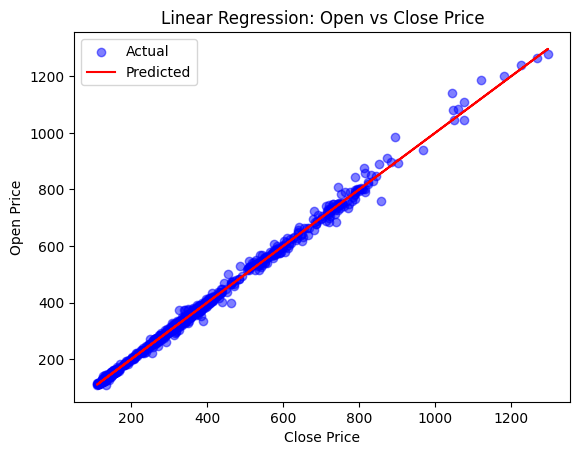

In [10]:
plt.scatter(X_test, y_test, color='blue', label='Actual',alpha=0.5)
plt.plot(X_test, predictions, color='red', label='Predicted')
plt.xlabel('Close Price')
plt.ylabel('Open Price')
plt.title('Linear Regression: Open vs Close Price')
plt.legend()
plt.show()

Scatter Plot of Open vs Close Prices Using Seaborn Jointplot

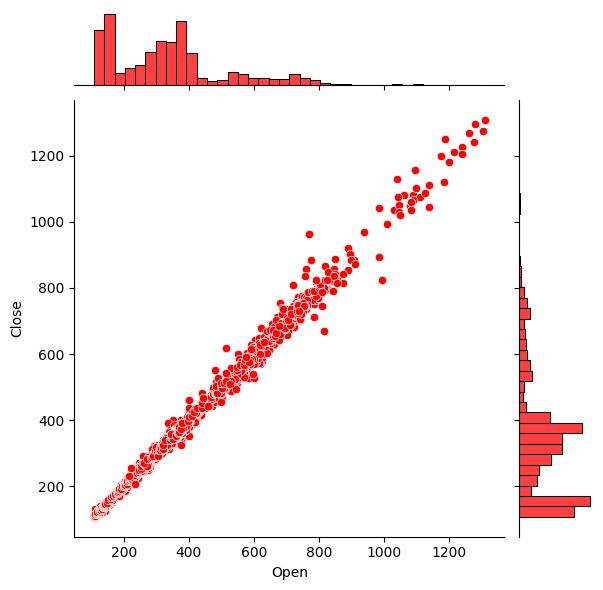

In [11]:
sns.jointplot(data=ADANIPORTSdataFrame,x=ADANIPORTSdataFrame["Open"],y=ADANIPORTSdataFrame['Close'],kind='scatter',color="red")
plt.show()

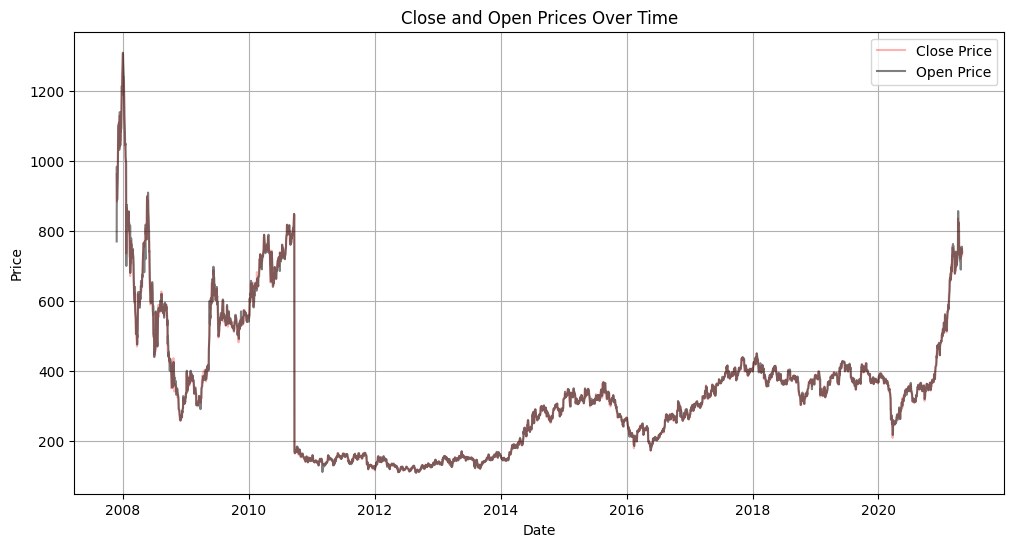

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

# Plot Close and Open prices
plt.plot(ADANIPORTSdataFrame['Close'], label='Close Price', color="red", alpha=0.3)
plt.plot(ADANIPORTSdataFrame['Open'], label='Open Price', color="black", alpha=0.5)

# Title and labels
plt.title('Close and Open Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Price')

# Add legend and grid
plt.legend()
plt.grid(True)

# Show the plot
plt.show()


Residual Plot to Assess Model Fit

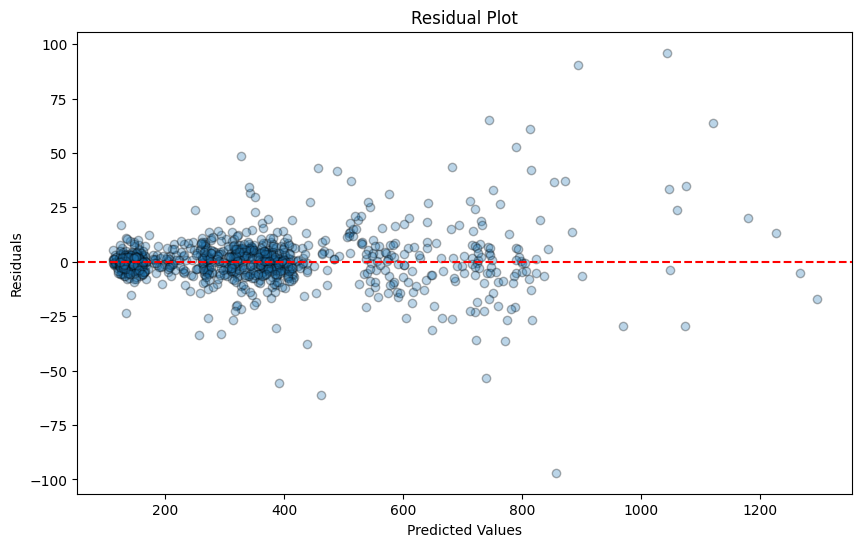

In [13]:
residuals = y_test - predictions
plt.figure(figsize=(10,6))
plt.scatter(predictions, residuals, alpha=0.3,edgecolor="black")
plt.axhline(0, color='red', linestyle='--')
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()



c:\Users\Mohit\Desktop\workspace\data_science\data_science\Lib\site-packages\mplfinance\_arg_validators.py:84: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


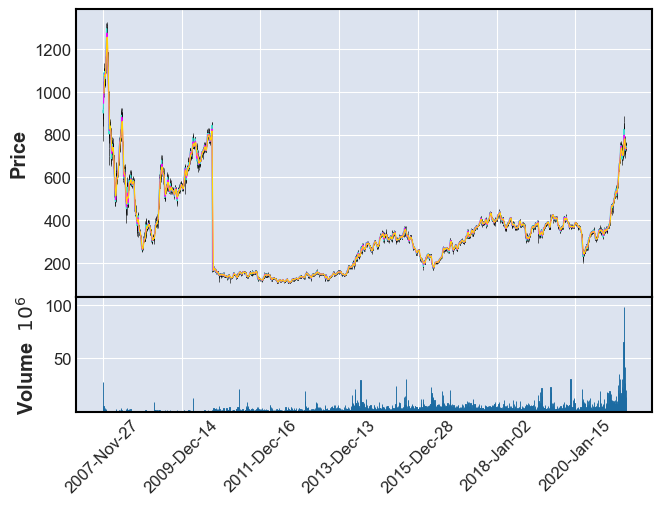

In [20]:
mpf.plot(ADANIPORTSdataFrame,type='candle',mav=(3,6,9),volume=True)

c:\Users\Mohit\Desktop\workspace\data_science\data_science\Lib\site-packages\mplfinance\_arg_validators.py:84: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


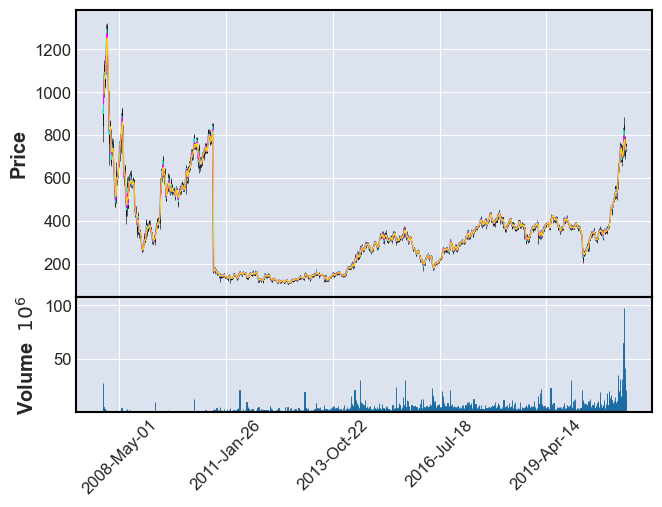

In [19]:
mpf.plot(ADANIPORTSdataFrame,type='candle',mav=(3,6,9),volume=True,show_nontrading=True)

In [18]:
ADANIPORTSdataFrame.to_csv("ADANIPORTS_CLEANED.csv")
